In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import patchworklib as pw 

<Figure size 100x100 with 0 Axes>

### Load dataset provided, clean and prepare a subset dataframe to work with

In [2]:
df_original = pd.read_excel("./RECIST_data sheet_HN_Sneha.xlsx")
df_original.head()

,Sr. No.,Sex,Diagnosis,Stage,Group stage (AJCC 8th),Treatment received,No. of Primary lesion,No. of nodes,Time between 2 CT (weeks),A_LD_pr_CT1,...,%change_B_SOD,SOD Category_B,B_Vol pr_CT1,B_Vol_ nodes_CT1,B_Tot Vol _CT1,B_Vol pr_CT2,B_Vol nodes_CT2,B_Vol Total_CT2,% vol change_B,B_vol category
0,1,Male,Ca Rt buccal mucosa,cT3N2cM0,IV A,CTRT,1,2,10.0,7.5,...,-14.814815,SD,52.6,13.3,65.9,36.9,3.3,40.2,-38.998483,PR
1,2,Male,Ca Lt buccal mucosa,cT4aN2bM0,IV A,CTRT,1,0,6.2,8.5,...,-14.285714,SD,80.6,0.0,80.6,47.0,0.0,47.0,-41.687345,PR
2,3,Male,Ca Lt buccal mucosa,cT4bN2bM0,IV B,CTRT,1,0,5.0,7.6,...,-28.235294,SD,72.0,0.0,72.0,31.2,0.0,31.2,-56.666667,PR
3,4,Male,Ca Rt pyriform sinus,cT2N3bM0,IV B,CTRT,1,2,4.5,5.1,...,-19.565217,SD,77.8,56.5,134.3,45.0,35.6,80.6,-39.985108,PR
4,5,Male,Ca lt border tongue,cT2N3bM0,IV B,CTHTRT,1,2,5.8,7.9,...,4.958678,SD,85.3,27.2,112.5,112.8,43.0,155.8,38.488889,PD


In [3]:
# Check the column names
for i,c in enumerate(df_original.columns):
  print(i,c)

0 Sr. No.
1 Sex
2 Diagnosis
3 Stage
4 Group stage (AJCC 8th)
5 Treatment received
6 No. of Primary lesion
7 No. of nodes
8 Time between 2 CT (weeks)
9 A_LD_pr_CT1
10 A_SAD node1_CT1
11 A_SAD node2_CT1
12 A_SOD_CT1
13 A_LDpr_CT2
14 A_SAD_node1_CT2
15 A_SADnode 2_CT2
16 A_SOD_CT2
17 A_SOD_%change
18 Unnamed: 18
19 A_Category_SOD
20 A_Vol pr_CT1
21 A_Vol nodes_CT1
22 A_Vol Total _CT1
23 A_Vol pr_CT2
24 A_Vol nodes_CT2
25 A_Vol Total_CT2
26 A_% vol change
27 Category_A_Vol
28 B_LD pr_CT1
29 B_SAD_node1_CT1
30 B_SAD node2_CT1
31 B_SOD CT1
32 B_LD pr_CT2
33 B_SAD 1_node_CT2
34 B_SAD node 2_CT2
35 B_SOD_CT2
36 %change_B_SOD
37 SOD Category_B
38 B_Vol pr_CT1
39 B_Vol_ nodes_CT1
40 B_Tot Vol _CT1
41 B_Vol pr_CT2
42 B_Vol nodes_CT2
43 B_Vol Total_CT2
44 % vol change_B
45 B_vol category


In [4]:
# Prepare a subset
df = df_original.loc[:,['A_SOD_CT1','A_SOD_CT2','A_SOD_%change','A_Vol Total _CT1','A_Vol Total_CT2','A_% vol change','B_SOD CT1','B_SOD_CT2','%change_B_SOD','B_Tot Vol _CT1','B_Vol Total_CT2','% vol change_B']]
df.head()

,A_SOD_CT1,A_SOD_CT2,A_SOD_%change,A_Vol Total _CT1,A_Vol Total_CT2,A_% vol change,B_SOD CT1,B_SOD_CT2,%change_B_SOD,B_Tot Vol _CT1,B_Vol Total_CT2,% vol change_B
0,10.5,8.6,-18.095238,54.5,31.1,-42.935780,10.8,9.2,-14.814815,65.9,40.2,-38.998483
1,8.5,7.5,-11.764706,79.6,41.3,-48.115578,8.4,7.2,-14.285714,80.6,47.0,-41.687345
2,7.6,5.4,-28.947368,56.2,20.5,-63.523132,8.5,6.1,-28.235294,72.0,31.2,-56.666667
3,9.1,8.5,-6.593407,124.6,79.4,-36.276083,9.2,7.4,-19.565217,134.3,80.6,-39.985108
4,12.1,13.0,7.438017,105.5,138.3,31.090047,12.1,12.7,4.958678,112.5,155.8,38.488889


In [5]:
# Rename the columns in the subset created
col = ['A_SOD_CT1','A_SOD_CT2','A_SOD_%change','A_Vol_Total_CT1','A_Vol_Total_CT2','A_Vol_%change','B_SOD_CT1','B_SOD_CT2','B_SOD_%change','B_Vol_Total_CT1','B_Vol_Total_CT2','B_Vol_%change']
df.columns = col
print(df.columns)
df.head()

Index(['A_SOD_CT1', 'A_SOD_CT2', 'A_SOD_%change', 'A_Vol_Total_CT1',
       'A_Vol_Total_CT2', 'A_Vol_%change', 'B_SOD_CT1', 'B_SOD_CT2',
       'B_SOD_%change', 'B_Vol_Total_CT1', 'B_Vol_Total_CT2', 'B_Vol_%change'],
      dtype='object')


,A_SOD_CT1,A_SOD_CT2,A_SOD_%change,A_Vol_Total_CT1,A_Vol_Total_CT2,A_Vol_%change,B_SOD_CT1,B_SOD_CT2,B_SOD_%change,B_Vol_Total_CT1,B_Vol_Total_CT2,B_Vol_%change
0,10.5,8.6,-18.095238,54.5,31.1,-42.935780,10.8,9.2,-14.814815,65.9,40.2,-38.998483
1,8.5,7.5,-11.764706,79.6,41.3,-48.115578,8.4,7.2,-14.285714,80.6,47.0,-41.687345
2,7.6,5.4,-28.947368,56.2,20.5,-63.523132,8.5,6.1,-28.235294,72.0,31.2,-56.666667
3,9.1,8.5,-6.593407,124.6,79.4,-36.276083,9.2,7.4,-19.565217,134.3,80.6,-39.985108
4,12.1,13.0,7.438017,105.5,138.3,31.090047,12.1,12.7,4.958678,112.5,155.8,38.488889


### Function for calculating r2

In [6]:
def r2(x, y):
  return round(stats.pearsonr(x, y)[0] ** 2, 2)

### Plot for '(a) Pretreatment : Observer 1, All tumour volumes'

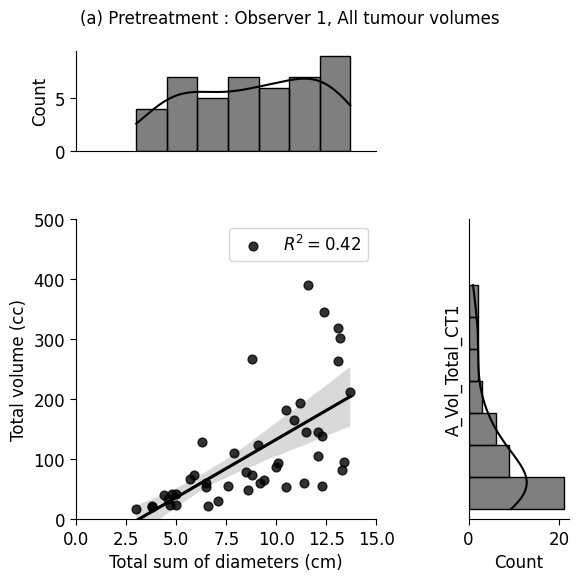

In [7]:
ax1 = pw.Brick("ax1", figsize=(3,1))
sns.histplot(data=df,  x="A_SOD_CT1", kde=True, ax=ax1, color='black')
ax1.set(xlim=(0,15))
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
# ax1.savefig()

ax2 = pw.Brick("ax2", figsize=(1,3))
sns.histplot(data=df, y="A_Vol_Total_CT1", kde=True, ax=ax2,color='black')
ax2.set(ylim=(0,500))
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False)
# ax2.savefig()

ax3 = pw.Brick("ax3", figsize=(3,3))
sns.regplot(ax=ax3,x='A_SOD_CT1', y="A_Vol_Total_CT1", data=df, color ='black',marker='o',scatter_kws={'color': 'black', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(df['A_SOD_CT1'],df['A_Vol_Total_CT1']))).legend(loc="best")
ax3.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax3.set(xlim=(0,15),ylim=(0,500))
ax3.spines["top"].set_visible(False) 
ax3.spines["right"].set_visible(False)
# ax3.savefig()

ax1.set_xlim(ax3.get_xlim())
ax1.set_xticks([])
ax1.set_xlabel("") 

ax2.set_ylim(ax3.get_ylim())
ax2.set_yticks([])
# ax2.set_ylabel("")

ax13 = ax1 / ax3
ax132 = ax13["ax3"] | ax2
ax132.case.set_title('(a) Pretreatment : Observer 1, All tumour volumes', size=12, pad=20)
ax132.savefig()

### Plot for  '(d) Pretreatment : Observer 2, All tumour volumes'

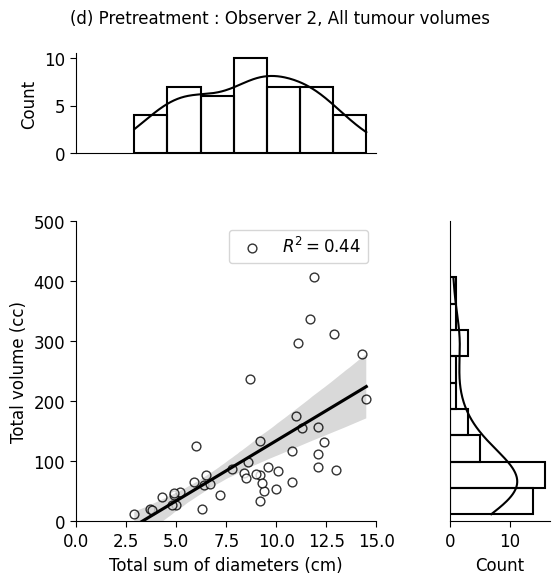

In [8]:
x,y=df['B_SOD_CT1'],df['B_Vol_Total_CT1']
data = df

# specify ax, fill
ax4 = pw.Brick("ax4", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax4,color='black', fill=False)
ax4.spines["top"].set_visible(False) 
ax4.set(xlim=(0,15))
ax4.spines["right"].set_visible(False)
ax4.savefig()

# specify ax, fill
ax5 = pw.Brick("ax5", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax5,color='black', fill= False)
ax5.spines["top"].set_visible(False) 
ax5.set(ylim=(0,500))
ax5.spines["right"].set_visible(False)
ax5.savefig()

# specify ax
ax6 = pw.Brick("ax6", figsize=(3,3))
sns.regplot(ax=ax6,x=x, y=y, data=data, color ='black',marker='o',scatter_kws={'color': 'white', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax6.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax6.set(xlim=(0,15),ylim=(0,500))
ax6.spines["top"].set_visible(False) 
ax6.spines["right"].set_visible(False)
ax6.savefig()

ax4.set_xlim(ax4.get_xlim())
ax4.set_xticks([])
ax4.set_xlabel("") 

ax5.set_ylim(ax5.get_ylim())
ax5.set_yticks([])
ax5.set_ylabel("")

ax46 = ax4 / ax6
ax465 = ax46["ax6"] | ax5
ax465.case.set_title('(d) Pretreatment : Observer 2, All tumour volumes', size=12, pad=20)
ax465.savefig()

Join above plots (a and d)

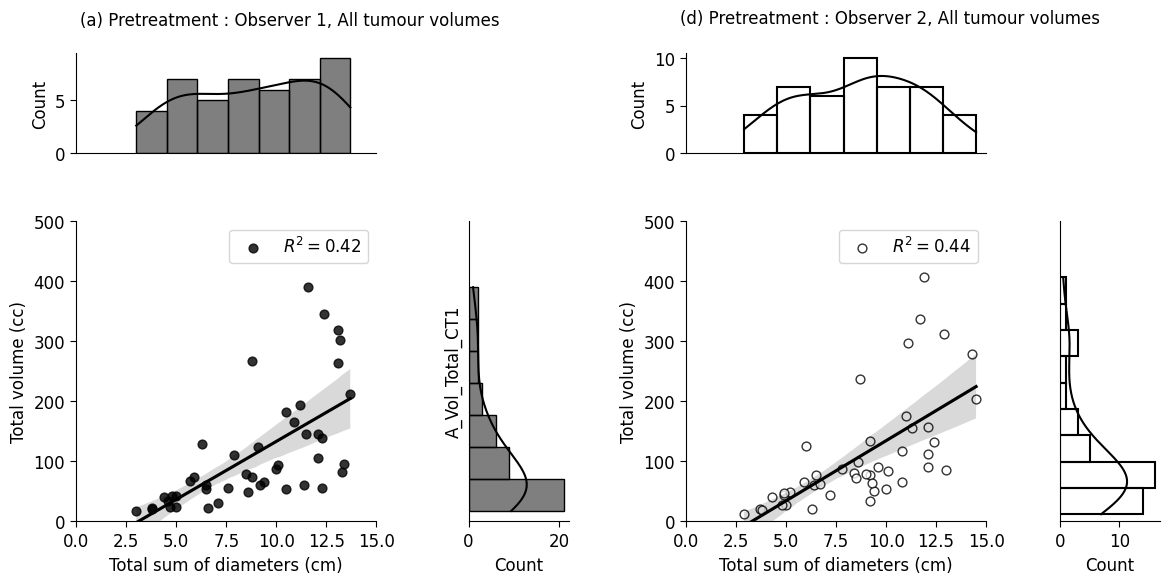

In [9]:
pw.param["margin"] = 0.5
ax132465 = ax132 | ax465
ax132465.savefig()

### Plots for '(b) Pretreatment : Observer 1,Tumour volumes <= 80 cc'

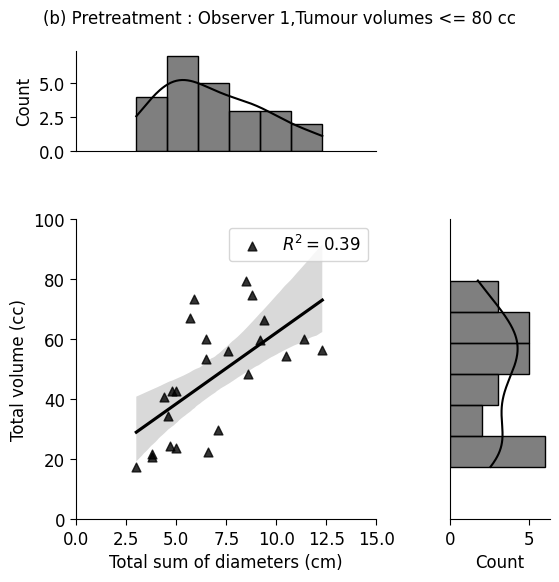

In [10]:
dfA_less = df[df["A_Vol_Total_CT1"]<=80]
#dfA_less.head()

x,y=dfA_less['A_SOD_CT1'],dfA_less['A_Vol_Total_CT1']
data = dfA_less 

# specify ax
ax7 = pw.Brick("ax7", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True,ax=ax7,color='black',fill=True)
ax7.spines["top"].set_visible(False) 
ax7.set(xlim=(0,15))
ax7.spines["right"].set_visible(False)
ax7.savefig()

# specify ax
ax8 = pw.Brick("ax8", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True,color='black',ax=ax8, fill=True)
ax8.spines["top"].set_visible(False) 
ax8.set(ylim=(0,100))
ax8.spines["right"].set_visible(False)
ax8.savefig()

# specify ax, marker, color
ax9 = pw.Brick("ax9", figsize=(3,3))
sns.regplot(ax=ax9,x=x, y=y, data=data, color ='black',marker='^',scatter_kws={'color': 'black', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax9.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax9.set(xlim=(0,15),ylim=(0,100))
ax9.spines["top"].set_visible(False) 
ax9.spines["right"].set_visible(False)
ax9.savefig()

ax7.set_xlim(ax7.get_xlim())
ax7.set_xticks([])
ax7.set_xlabel("") 

ax8.set_ylim(ax8.get_ylim())
ax8.set_yticks([])
ax8.set_ylabel("")

ax79 = ax7 / ax9
ax798 = ax79["ax9"] | ax8
ax798.case.set_title('(b) Pretreatment : Observer 1,Tumour volumes <= 80 cc', size=12, pad=20)
ax798.savefig()


### Plots for '(e) Pretreatment : Observer 2, Tumour volumes <= 80 cc'

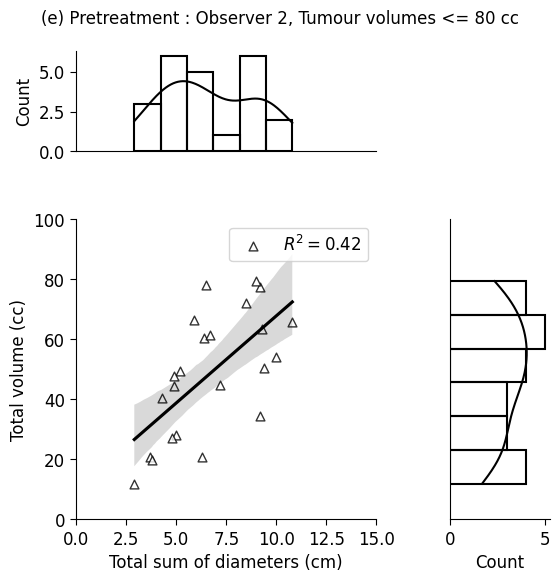

In [11]:
dfB_less = df[df["B_Vol_Total_CT1"]<=80]
#dfB_less.head()

x,y=dfB_less['B_SOD_CT1'],dfB_less['B_Vol_Total_CT1']
data = dfB_less

# specify ax, fill
ax10 = pw.Brick("ax10", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax10,color='black', fill=False)
ax10.spines["top"].set_visible(False) 
ax10.set(xlim=(0,15))
ax10.spines["right"].set_visible(False)
ax10.savefig()

# specify ax, fill
ax11 = pw.Brick("ax11", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax11,color='black', fill= False)
ax11.spines["top"].set_visible(False) 
ax11.set(ylim=(0,100))
ax11.spines["right"].set_visible(False)
ax11.savefig()

# specify ax, marker, color
ax12 = pw.Brick("ax12", figsize=(3,3))
sns.regplot(ax=ax12,x=x, y=y, data=data, color ='black',marker='^',scatter_kws={'color': 'white', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax12.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax12.set(xlim=(0,15),ylim=(0,100))
ax12.spines["top"].set_visible(False) 
ax12.spines["right"].set_visible(False)
ax12.savefig()

ax10.set_xlim(ax10.get_xlim())
ax10.set_xticks([])
ax10.set_xlabel("") 

ax11.set_ylim(ax11.get_ylim())
ax11.set_yticks([])
ax11.set_ylabel("")

ax1012 = ax10 / ax12
ax101211 = ax1012["ax12"] | ax11
ax101211.case.set_title('(e) Pretreatment : Observer 2, Tumour volumes <= 80 cc', size=12, pad=20)
ax101211.savefig()

Join the above two plots (b and e)

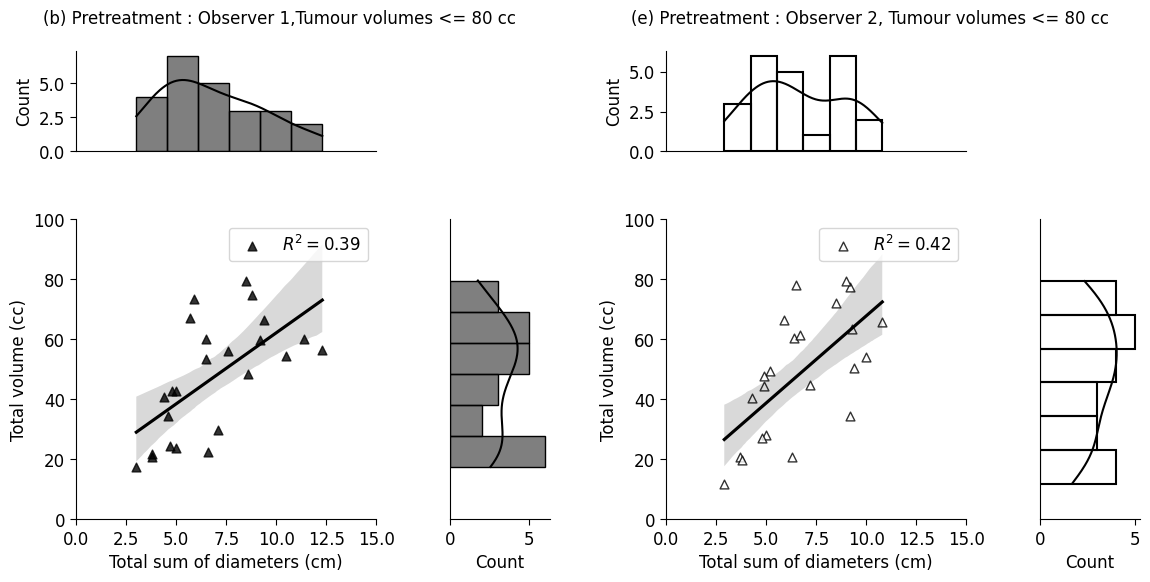

In [12]:
pw.param["margin"] = 0.5
ax798101211 = ax798 | ax101211 
ax798101211.savefig()

Join the above two combined plots (a,d,b,e)

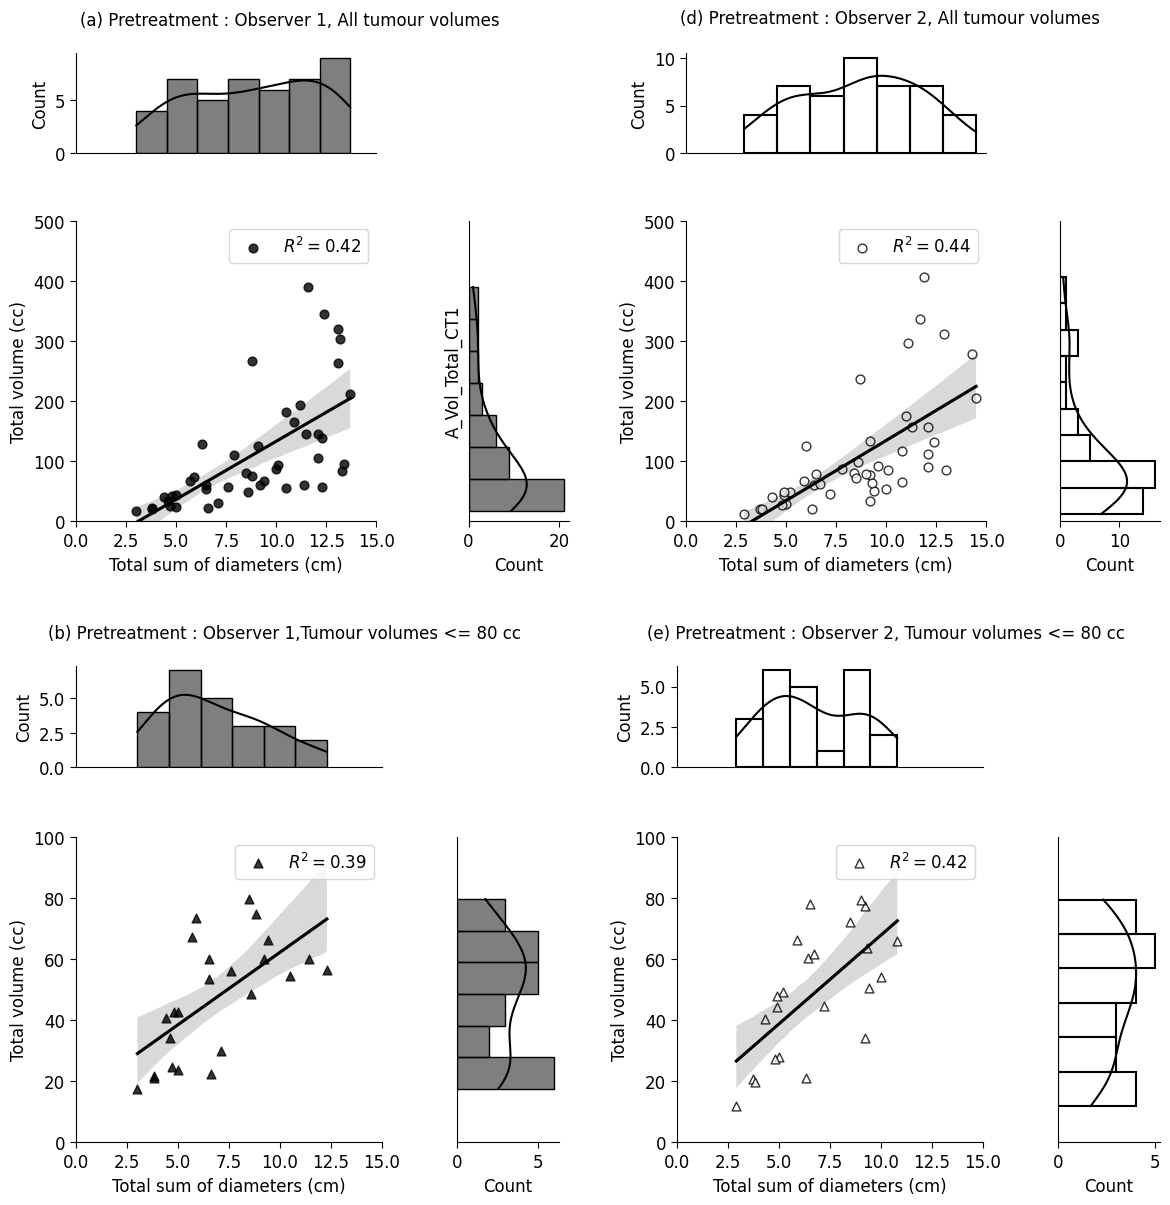

In [13]:
pw.param["margin"] = 0.5
ax132465798101211 = ax132465 / ax798101211
ax132465798101211.savefig()

### Plots for '(c) Pretreatment : Observer 1,Tumour volumes > 80 cc'

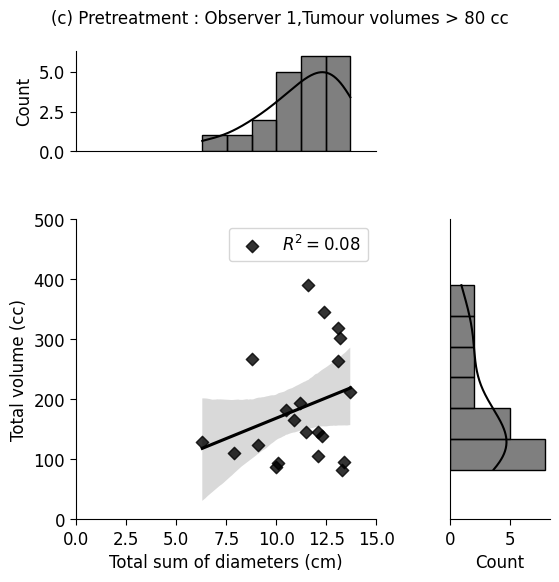

In [14]:
dfA_more = df[df["A_Vol_Total_CT1"]>80]
#dfA_more.head()

x,y=dfA_more['A_SOD_CT1'],dfA_more['A_Vol_Total_CT1']
data = dfA_more 

# specify ax,fill,color
ax13 = pw.Brick("ax13", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True,ax=ax13,color='black',fill=True)
ax13.spines["top"].set_visible(False) 
ax13.set(xlim=(0,15))
ax13.spines["right"].set_visible(False)
ax13.savefig()

# specify ax
ax14 = pw.Brick("ax14", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True,color='black',ax=ax14, fill=True)
ax14.spines["top"].set_visible(False) 
ax14.set(ylim=(0,500))
ax14.spines["right"].set_visible(False)
ax14.savefig()

# specify ax, marker, color
ax15 = pw.Brick("ax15", figsize=(3,3))
sns.regplot(ax=ax15,x=x, y=y, data=data, color ='black',marker='D',scatter_kws={'color': 'black', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax15.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax15.set(xlim=(0,15),ylim=(0,500))
ax15.spines["top"].set_visible(False) 
ax15.spines["right"].set_visible(False)
ax15.savefig()

ax13.set_xlim(ax13.get_xlim())
ax13.set_xticks([])
ax13.set_xlabel("") 

ax14.set_ylim(ax14.get_ylim())
ax14.set_yticks([])
ax14.set_ylabel("")

ax1315 = ax13 / ax15
ax131514 = ax1315["ax15"] | ax14
ax131514.case.set_title('(c) Pretreatment : Observer 1,Tumour volumes > 80 cc', size=12, pad=20)
ax131514.savefig()


### Plots for '(f) Pretreatment : Observer 2,Tumour volumes > 80 cc'

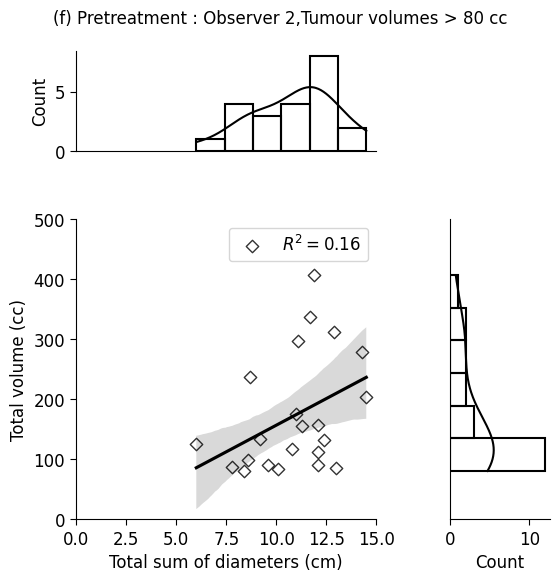

In [15]:
dfB_more = df[df["B_Vol_Total_CT1"]>80]
#dfA_more.head()

x,y=dfB_more['B_SOD_CT1'],dfB_more['B_Vol_Total_CT1']
data = dfB_more 

# specify ax,fill,color
ax16 = pw.Brick("ax16", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True,ax=ax16,color='black',fill=False)
ax16.spines["top"].set_visible(False) 
ax16.set(xlim=(0,15))
ax16.spines["right"].set_visible(False)
ax16.savefig()

# specify ax
ax17 = pw.Brick("ax17", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True,color='black',ax=ax17, fill=False)
ax17.spines["top"].set_visible(False) 
ax17.set(ylim=(0,500))
ax17.spines["right"].set_visible(False)
ax17.savefig()

# specify ax, marker, color
ax18 = pw.Brick("ax18", figsize=(3,3))
sns.regplot(ax=ax18,x=x, y=y, data=data, color ='black',marker='D',scatter_kws={'color': 'white', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax18.set(xlabel='Total sum of diameters (cm)', ylabel='Total volume (cc)')
ax18.set(xlim=(0,15),ylim=(0,500))
ax18.spines["top"].set_visible(False) 
ax18.spines["right"].set_visible(False)
ax18.savefig()

ax16.set_xlim(ax16.get_xlim())
ax16.set_xticks([])
ax16.set_xlabel("") 

ax17.set_ylim(ax17.get_ylim())
ax17.set_yticks([])
ax17.set_ylabel("")

ax1618 = ax16 / ax18
ax161817 = ax1618["ax18"] | ax17
ax161817.case.set_title('(f) Pretreatment : Observer 2,Tumour volumes > 80 cc', size=12, pad=20)
ax161817.savefig()

Join the above two plots (c and f)

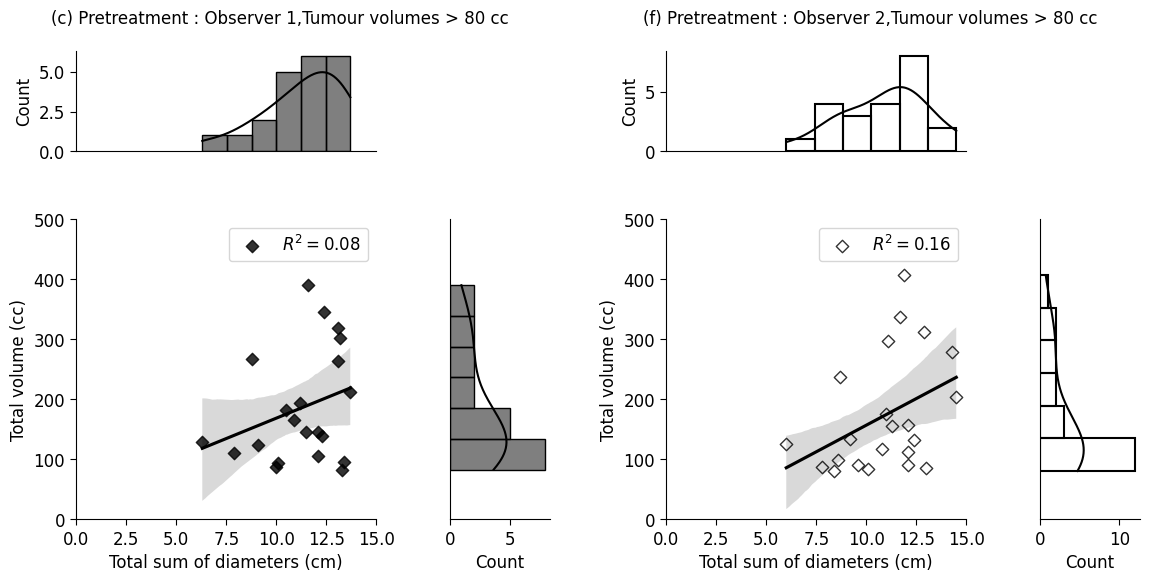

In [16]:
pw.param["margin"] = 0.5
ax131514161817 = ax131514 | ax161817 
ax131514161817.savefig()

Join the above two combined plots (a,d,b,e,c,f)

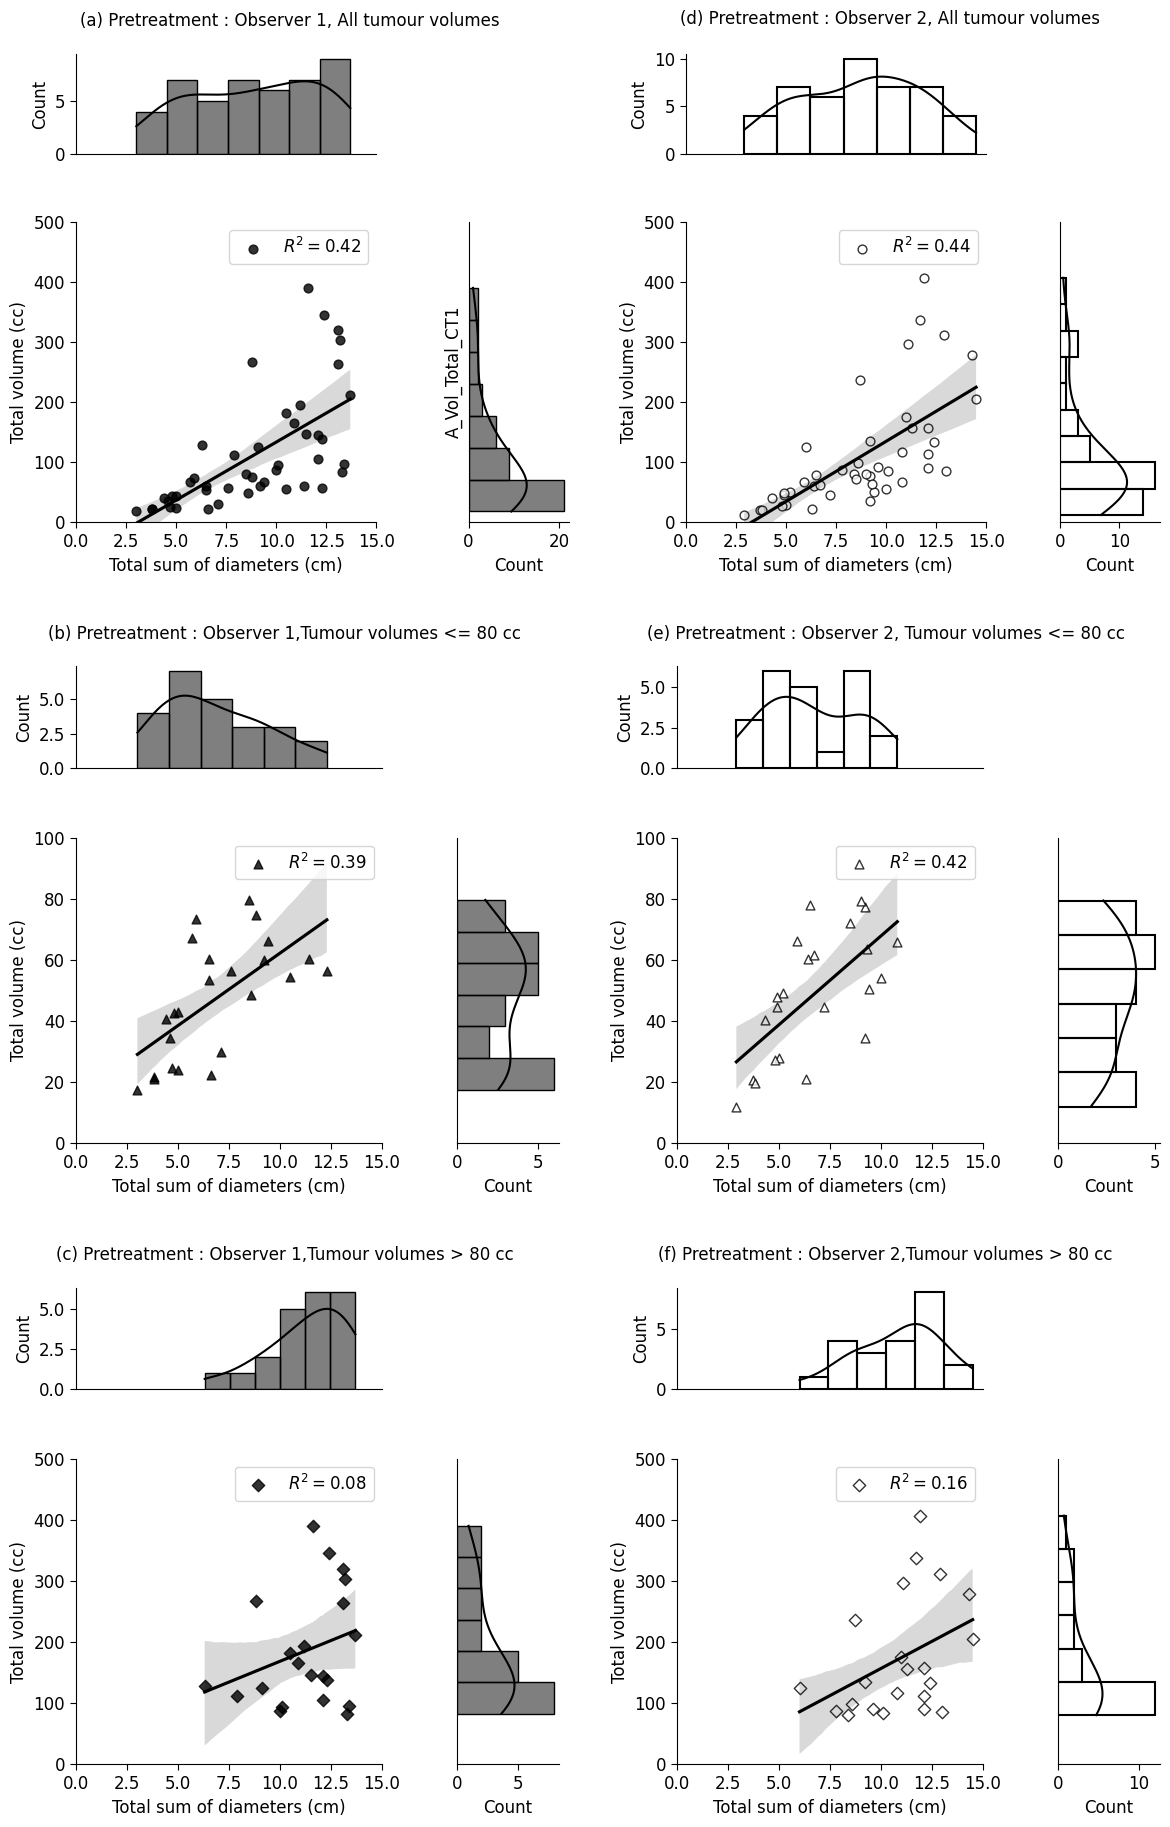

In [17]:
pw.param["margin"] = 0.5
ax132465798101211131514161817 = ax132465798101211 / ax131514161817
ax132465798101211131514161817.savefig()

Save figure 1

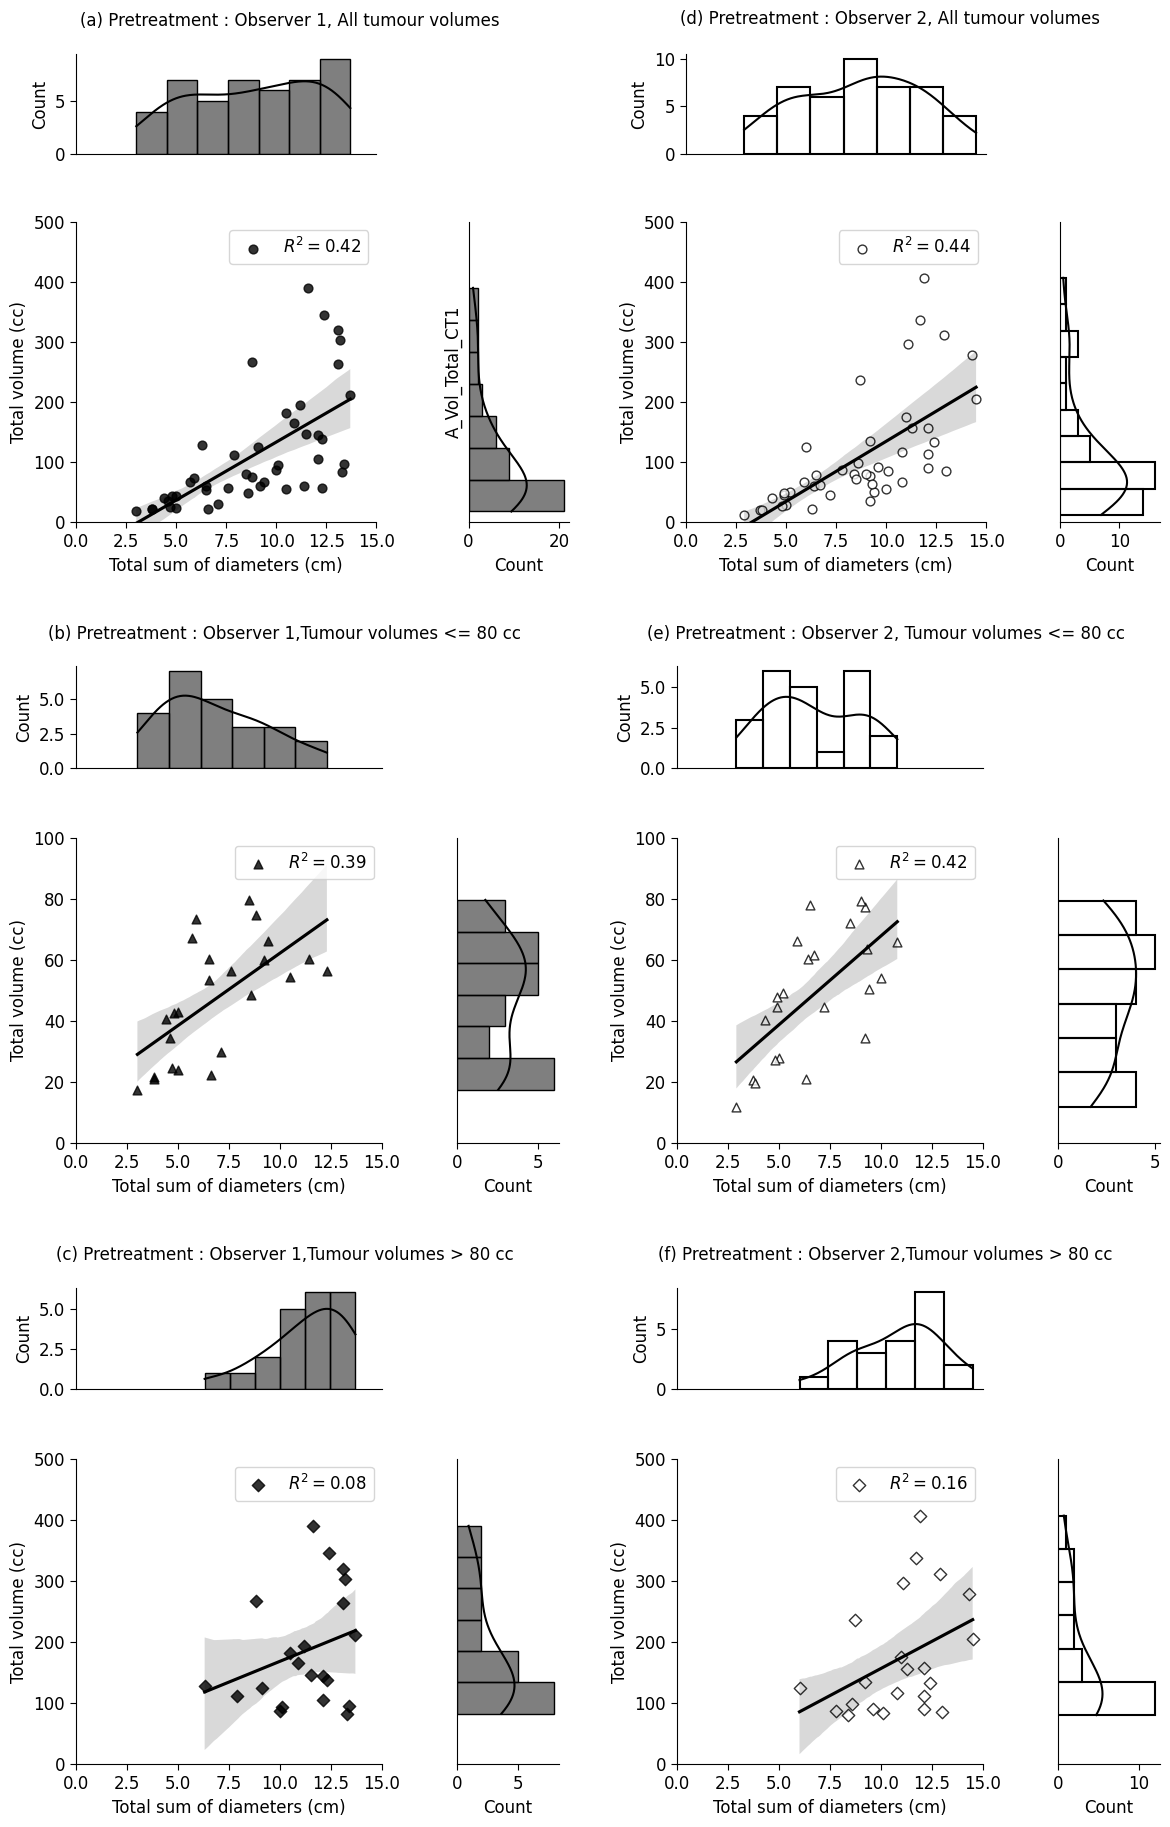

In [19]:
ax132465798101211131514161817.savefig("./Figure1.png",dpi=300)
ax132465798101211131514161817.savefig("./Figure1.pdf")

## Figure 3

### Plot for '(a) % Change in SOD : Observer 1 vs 2'

In [18]:
data.head()

,A_SOD_CT1,A_SOD_CT2,A_SOD_%change,A_Vol_Total_CT1,A_Vol_Total_CT2,A_Vol_%change,B_SOD_CT1,B_SOD_CT2,B_SOD_%change,B_Vol_Total_CT1,B_Vol_Total_CT2,B_Vol_%change
1,8.5,7.5,-11.764706,79.6,41.3,-48.115578,8.4,7.2,-14.285714,80.6,47.0,-41.687345
3,9.1,8.5,-6.593407,124.6,79.4,-36.276083,9.2,7.4,-19.565217,134.3,80.6,-39.985108
4,12.1,13.0,7.438017,105.5,138.3,31.090047,12.1,12.7,4.958678,112.5,155.8,38.488889
7,13.1,10.7,-18.320611,263.8,148.3,-43.783169,14.3,11.4,-20.279720,278.9,167.8,-39.835066
8,6.3,5.3,-15.873016,128.7,92.4,-28.205128,6.0,5.3,-11.666667,125.4,98.1,-21.770335


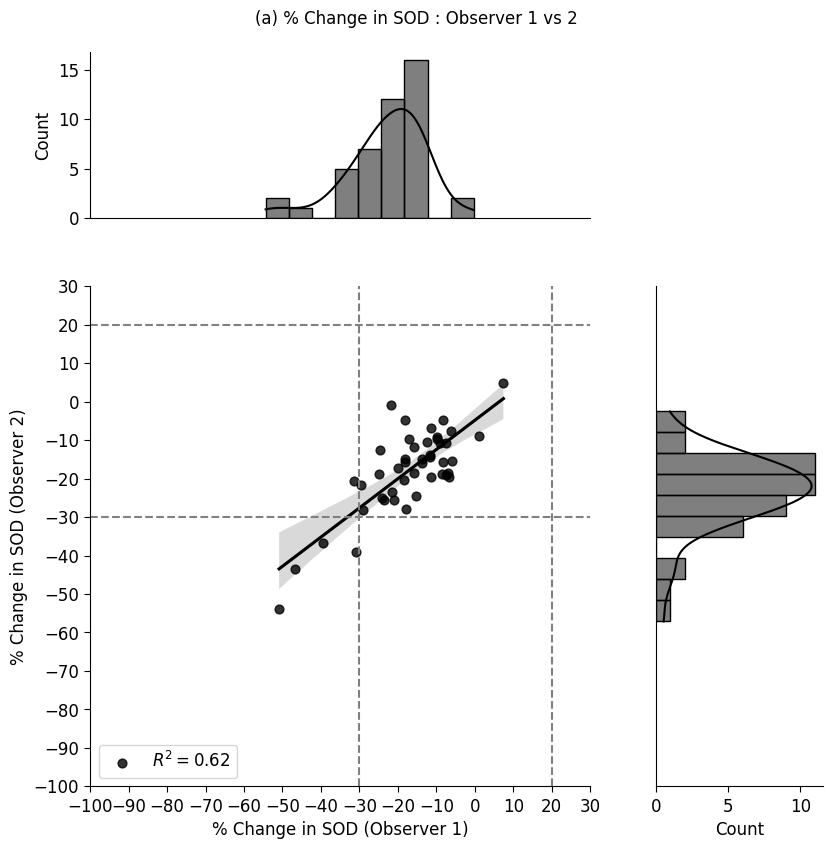

In [19]:
x,y=df['A_SOD_%change'],df[ 'B_SOD_%change']
data = df

# specify ax, fill
ax19 = pw.Brick("ax19", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax19,color='black', fill=True)
ax19.spines["top"].set_visible(False) 
ax19.set_xticks(np.arange(-100,40,10))
ax19.set(xlim=(-100,40))
ax19.spines["right"].set_visible(False)
ax19.savefig()

# specify ax, fill
ax20 = pw.Brick("ax20", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax20,color='black', fill= True)
ax20.spines["top"].set_visible(False)
ax20.set_yticks(np.arange(-100,40,10))
ax20.set(ylim=(-100,40))
ax20.spines["right"].set_visible(False)
ax20.savefig()

# specify ax
ax21 = pw.Brick("ax21", figsize=(5,5))
sns.regplot(ax=ax21,x=x, y=y, data=data, color ='black',marker='o',scatter_kws={'color': 'black', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax21.set(xlabel='% Change in SOD (Observer 1)', ylabel='% Change in SOD (Observer 2)')
#ax21.set(xlim=(-100,40),ylim=(-100,40))
ax21.set_xticks(np.arange(-100,40,10))
ax21.set_yticks(np.arange(-100,40,10))
ax21.axhline(20,linestyle='--',color='gray')
ax21.axhline(-30,linestyle='--',color='gray')
ax21.axvline(20,linestyle='--',color='gray')
ax21.axvline(-30,linestyle='--',color='gray')
ax21.spines["top"].set_visible(False) 
ax21.spines["right"].set_visible(False)
ax21.savefig()

ax19.set_xlim(ax19.get_xlim())
ax19.set_xticks([])
ax19.set_xlabel("") 

ax20.set_ylim(ax20.get_ylim())
ax20.set_yticks([])
ax20.set_ylabel("")

ax1921 = ax19 / ax21
ax192120 = ax1921["ax21"] | ax20
ax192120.case.set_title('(a) % Change in SOD : Observer 1 vs 2', size=12, pad=20)
ax192120.savefig()

###  Plot for '(b) % Change in volume (Observer 1 vs 2)'

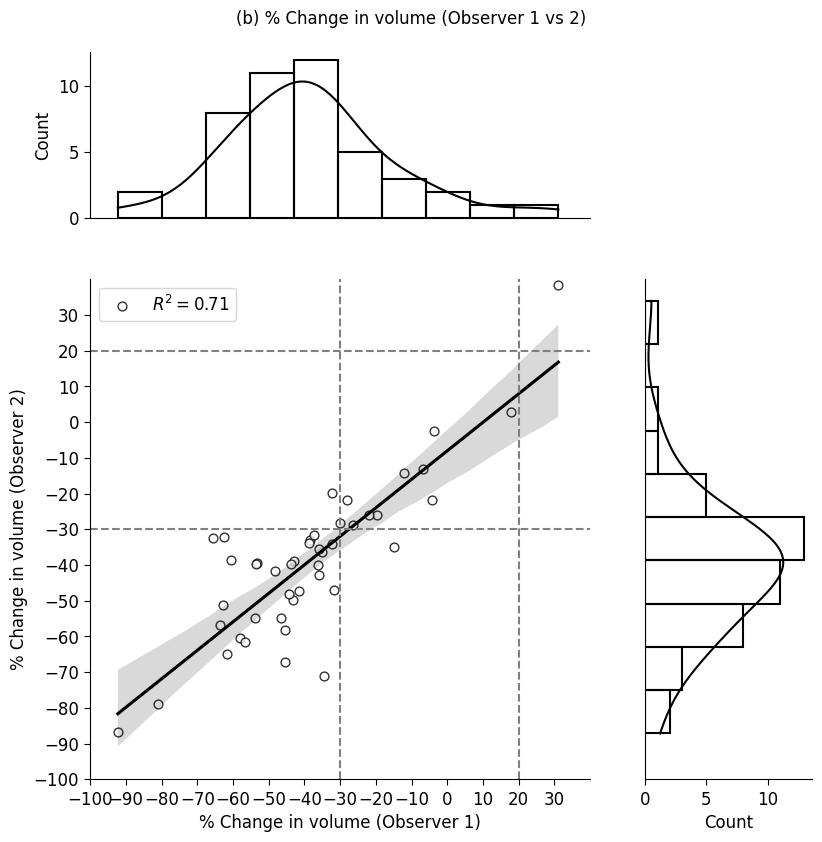

In [20]:
x,y=df['A_Vol_%change'],df['B_Vol_%change']
data = df

# specify ax, fill
ax22 = pw.Brick("ax22", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax22,color='black', fill=False)
ax22.spines["top"].set_visible(False) 
ax22.set(xlim=(-100,40))
ax22.set_xticks(np.arange(-100,40,10))
ax22.spines["right"].set_visible(False)
ax22.savefig()

# specify ax, fill
ax23 = pw.Brick("ax23", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax23,color='black', fill= False)
ax23.spines["top"].set_visible(False) 
#ax23.set(ylim=(-100,40))
ax23.set_yticks(np.arange(-100,40,10))
ax23.spines["right"].set_visible(False)
ax23.savefig()

# specify ax
ax24 = pw.Brick("ax24", figsize=(5,5))
sns.regplot(ax=ax24,x=x, y=y, data=data, color ='black',marker='o',scatter_kws={'color': 'white', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax24.set(xlabel='% Change in volume (Observer 1)', ylabel='% Change in volume (Observer 2)')
ax24.set(xlim=(-100,40),ylim=(-100,40))
ax24.set_xticks(np.arange(-100,40,10))
ax24.set_yticks(np.arange(-100,40,10))
ax24.axhline(20,linestyle='--',color='gray')
ax24.axhline(-30,linestyle='--',color='gray')
ax24.axvline(20,linestyle='--',color='gray')
ax24.axvline(-30,linestyle='--',color='gray')
ax24.spines["top"].set_visible(False) 
ax24.spines["right"].set_visible(False)
ax24.savefig()

ax22.set_xlim(ax22.get_xlim())
ax22.set_xticks([])
ax22.set_xlabel("") 

ax23.set_ylim(ax23.get_ylim())
ax23.set_yticks([])
ax23.set_ylabel("")

ax2224 = ax22 / ax24
ax222423 = ax2224["ax24"] | ax23
ax222423.case.set_title('(b) % Change in volume (Observer 1 vs 2)', size=12, pad=20)
ax222423.savefig()

Join the above two plots (a and b)

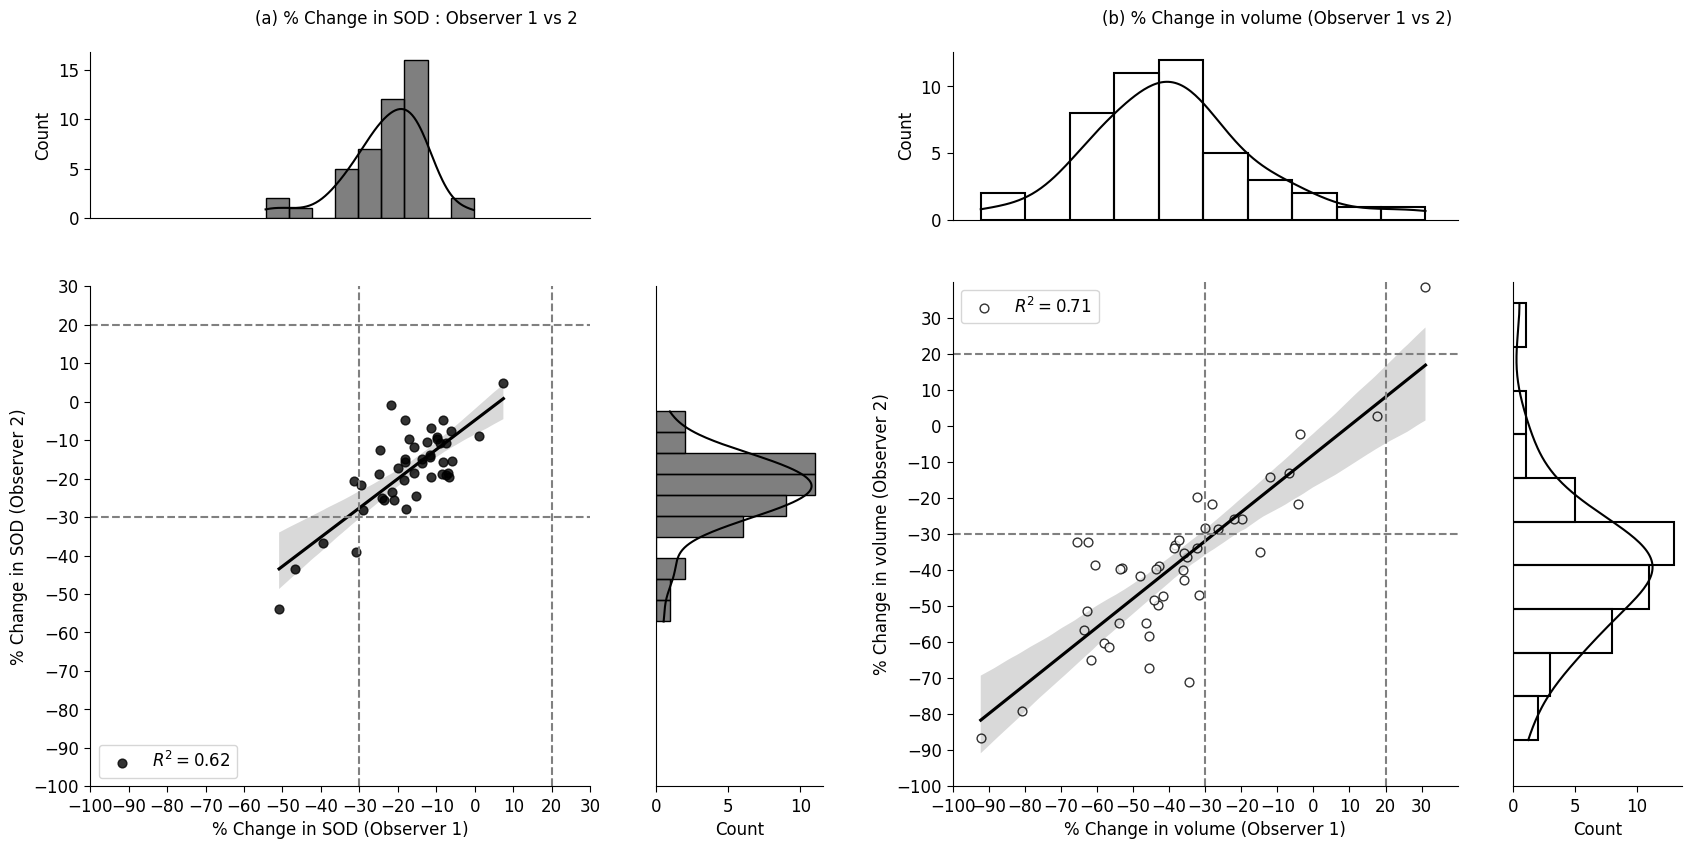

In [21]:
pw.param["margin"] = 0.5
ax192120222423 = ax192120 | ax222423 
ax192120222423.savefig()

### Plot for '(c) % Change in volume vs SOD (Observer 1)'

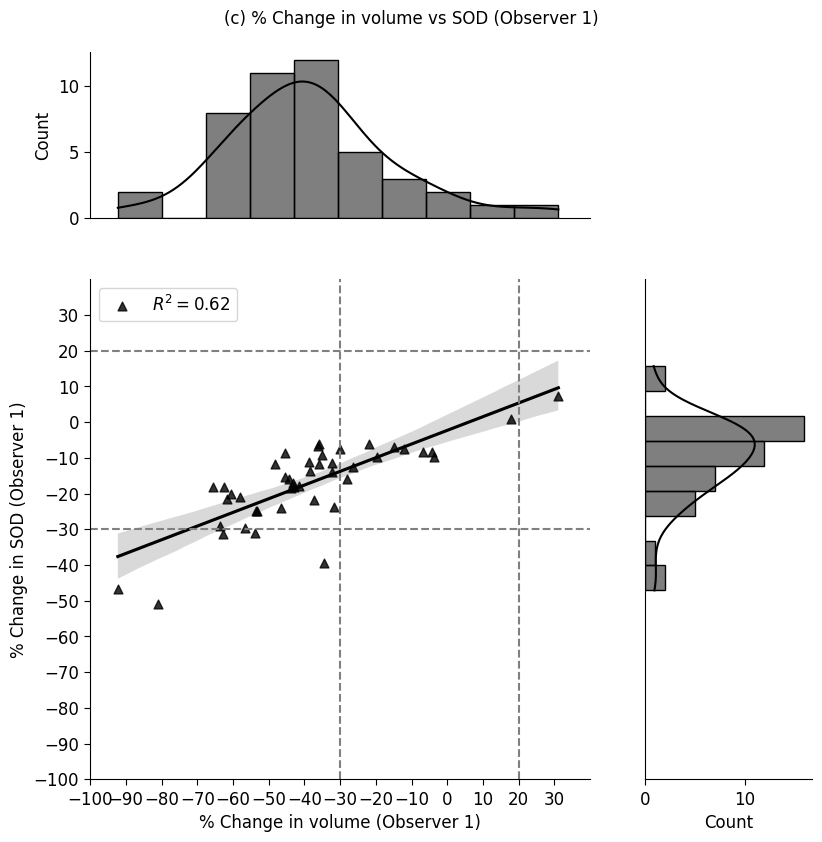

In [22]:
x,y=df['A_Vol_%change'], df['A_SOD_%change'],
data = df

# specify ax, fill
ax25 = pw.Brick("ax25", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax25,color='black', fill=True)
ax25.spines["top"].set_visible(False) 
ax25.set(xlim=(-100,40))
ax25.set_xticks(np.arange(-100,40,10))
ax25.spines["right"].set_visible(False)
ax25.savefig()

# specify ax, fill
ax26 = pw.Brick("ax26", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax26,color='black', fill= True)
ax26.spines["top"].set_visible(False) 
ax26.set_yticks(np.arange(-100,40,10))
#ax26.set_yticks(np.arange(min(-100),max(40),10))
ax26.spines["right"].set_visible(False)
ax26.savefig()

# specify ax
ax27 = pw.Brick("ax27", figsize=(5,5))
sns.regplot(ax=ax27,x=x, y=y, data=data, color ='black',marker='^',scatter_kws={'color': 'black', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax27.set(xlabel='% Change in volume (Observer 1)', ylabel='% Change in SOD (Observer 1)')
ax27.set(xlim=(-100,40),ylim=(-100,40))
ax27.set_xticks(np.arange(-100,40,10))
ax27.set_yticks(np.arange(-100,40,10))
ax27.axhline(20,linestyle='--',color='gray')
ax27.axhline(-30,linestyle='--',color='gray')
ax27.axvline(20,linestyle='--',color='gray')
ax27.axvline(-30,linestyle='--',color='gray')
ax27.spines["top"].set_visible(False) 
ax27.spines["right"].set_visible(False)
ax27.savefig()

ax25.set_xlim(ax25.get_xlim())
ax25.set_xticks([])
ax25.set_xlabel("") 

ax26.set_ylim(ax26.get_ylim())
ax26.set_yticks([])
ax26.set_ylabel("")

ax2527 = ax25 / ax27
ax252726 = ax2527["ax27"] | ax26
ax252726.case.set_title('(c) % Change in volume vs SOD (Observer 1)', size=12, pad=20)
ax252726.savefig()

### Plot for '(d) % Change in volume vs SOD (Observer 2)'

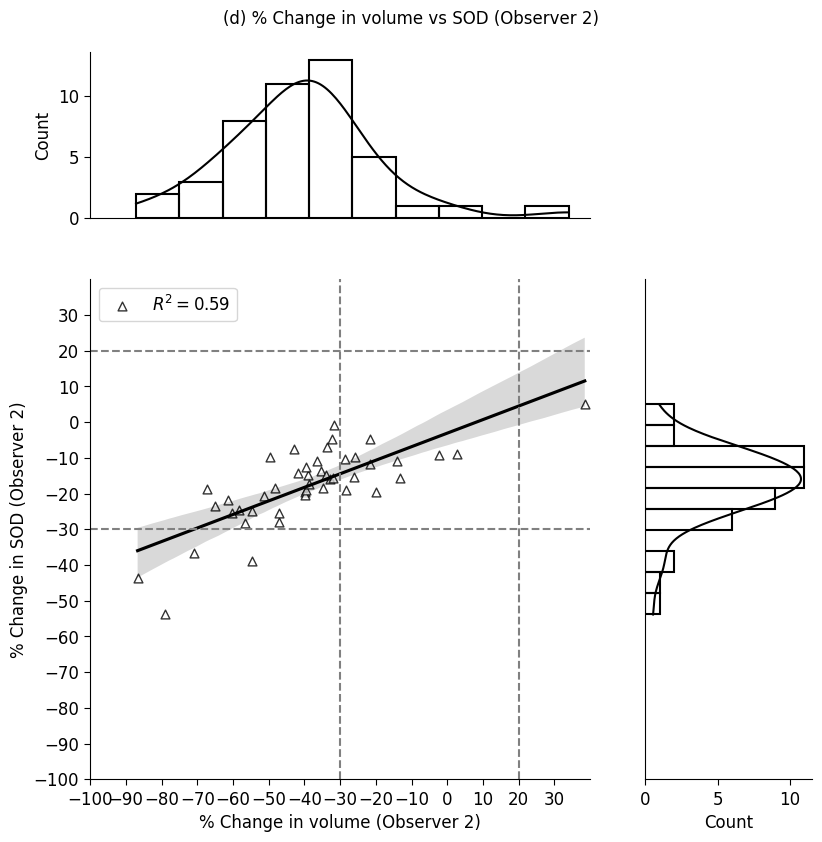

In [23]:
x,y=df['B_Vol_%change'],df['B_SOD_%change']
data = df

# specify ax, fill
ax28 = pw.Brick("ax28", figsize=(3,1))
sns.histplot(data=data, x=x, kde=True, ax=ax28,color='black', fill=False)
ax28.spines["top"].set_visible(False) 
#ax28.set(xlim=(-100,40))
ax28.set_xticks(np.arange(-100,40,10))
ax28.spines["right"].set_visible(False)
ax28.savefig()

# specify ax, fill
ax29 = pw.Brick("ax29", figsize=(1,3))
sns.histplot(data=data, y=y, kde=True, ax=ax29,color='black', fill= False)
ax29.spines["top"].set_visible(False) 
ax29.set(ylim=(-100,40))
ax29.set_yticks(np.arange(-100,40,10))
ax29.spines["right"].set_visible(False)
ax29.savefig()

# specify ax
ax30 = pw.Brick("ax30", figsize=(5,5))
sns.regplot(ax=ax30,x=x, y=y, data=data, color ='black',marker='^',scatter_kws={'color': 'white', 'edgecolors': 'black', 's': 40},ci=95, label="$R^2={}$".format(r2(x,y))).legend(loc="best")
ax30.set(xlabel='% Change in volume (Observer 2)', ylabel='% Change in SOD (Observer 2)')
ax30.set(xlim=(-100,40),ylim=(-100,40))
ax30.set_xticks(np.arange(-100,40,10))
ax30.set_yticks(np.arange(-100,40,10))
ax30.axhline(20,linestyle='--',color='gray')
ax30.axhline(-30,linestyle='--',color='gray')
ax30.axvline(20,linestyle='--',color='gray')
ax30.axvline(-30,linestyle='--',color='gray')
ax30.spines["top"].set_visible(False) 
ax30.spines["right"].set_visible(False)
ax30.savefig()

ax28.set_xlim(ax28.get_xlim())
ax28.set_xticks([])
ax28.set_xlabel("") 

ax29.set_ylim(ax29.get_ylim())
ax29.set_yticks([])
ax29.set_ylabel("")

ax2830 = ax28 / ax30
ax283029 = ax2830["ax30"] | ax29
ax283029.case.set_title('(d) % Change in volume vs SOD (Observer 2)', size=12, pad=20)
ax283029.savefig()

Join the above two plots (c and d)

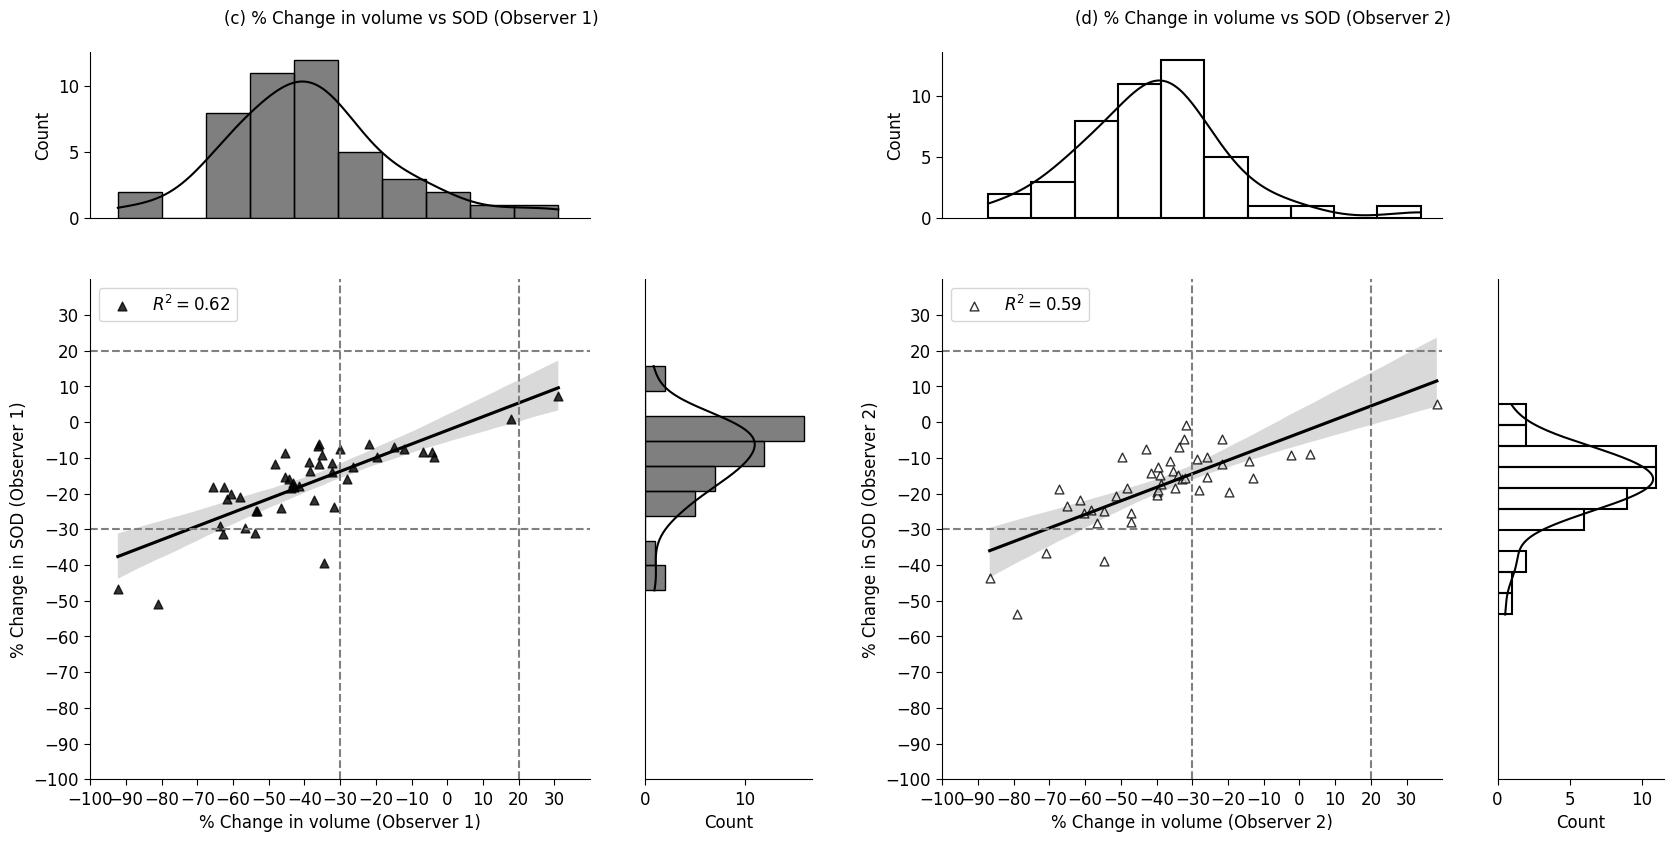

In [24]:
pw.param["margin"] = 0.5
ax252726283029 = ax252726 | ax283029
ax252726283029.savefig()

Join the above combined plots (a,b,c and d)

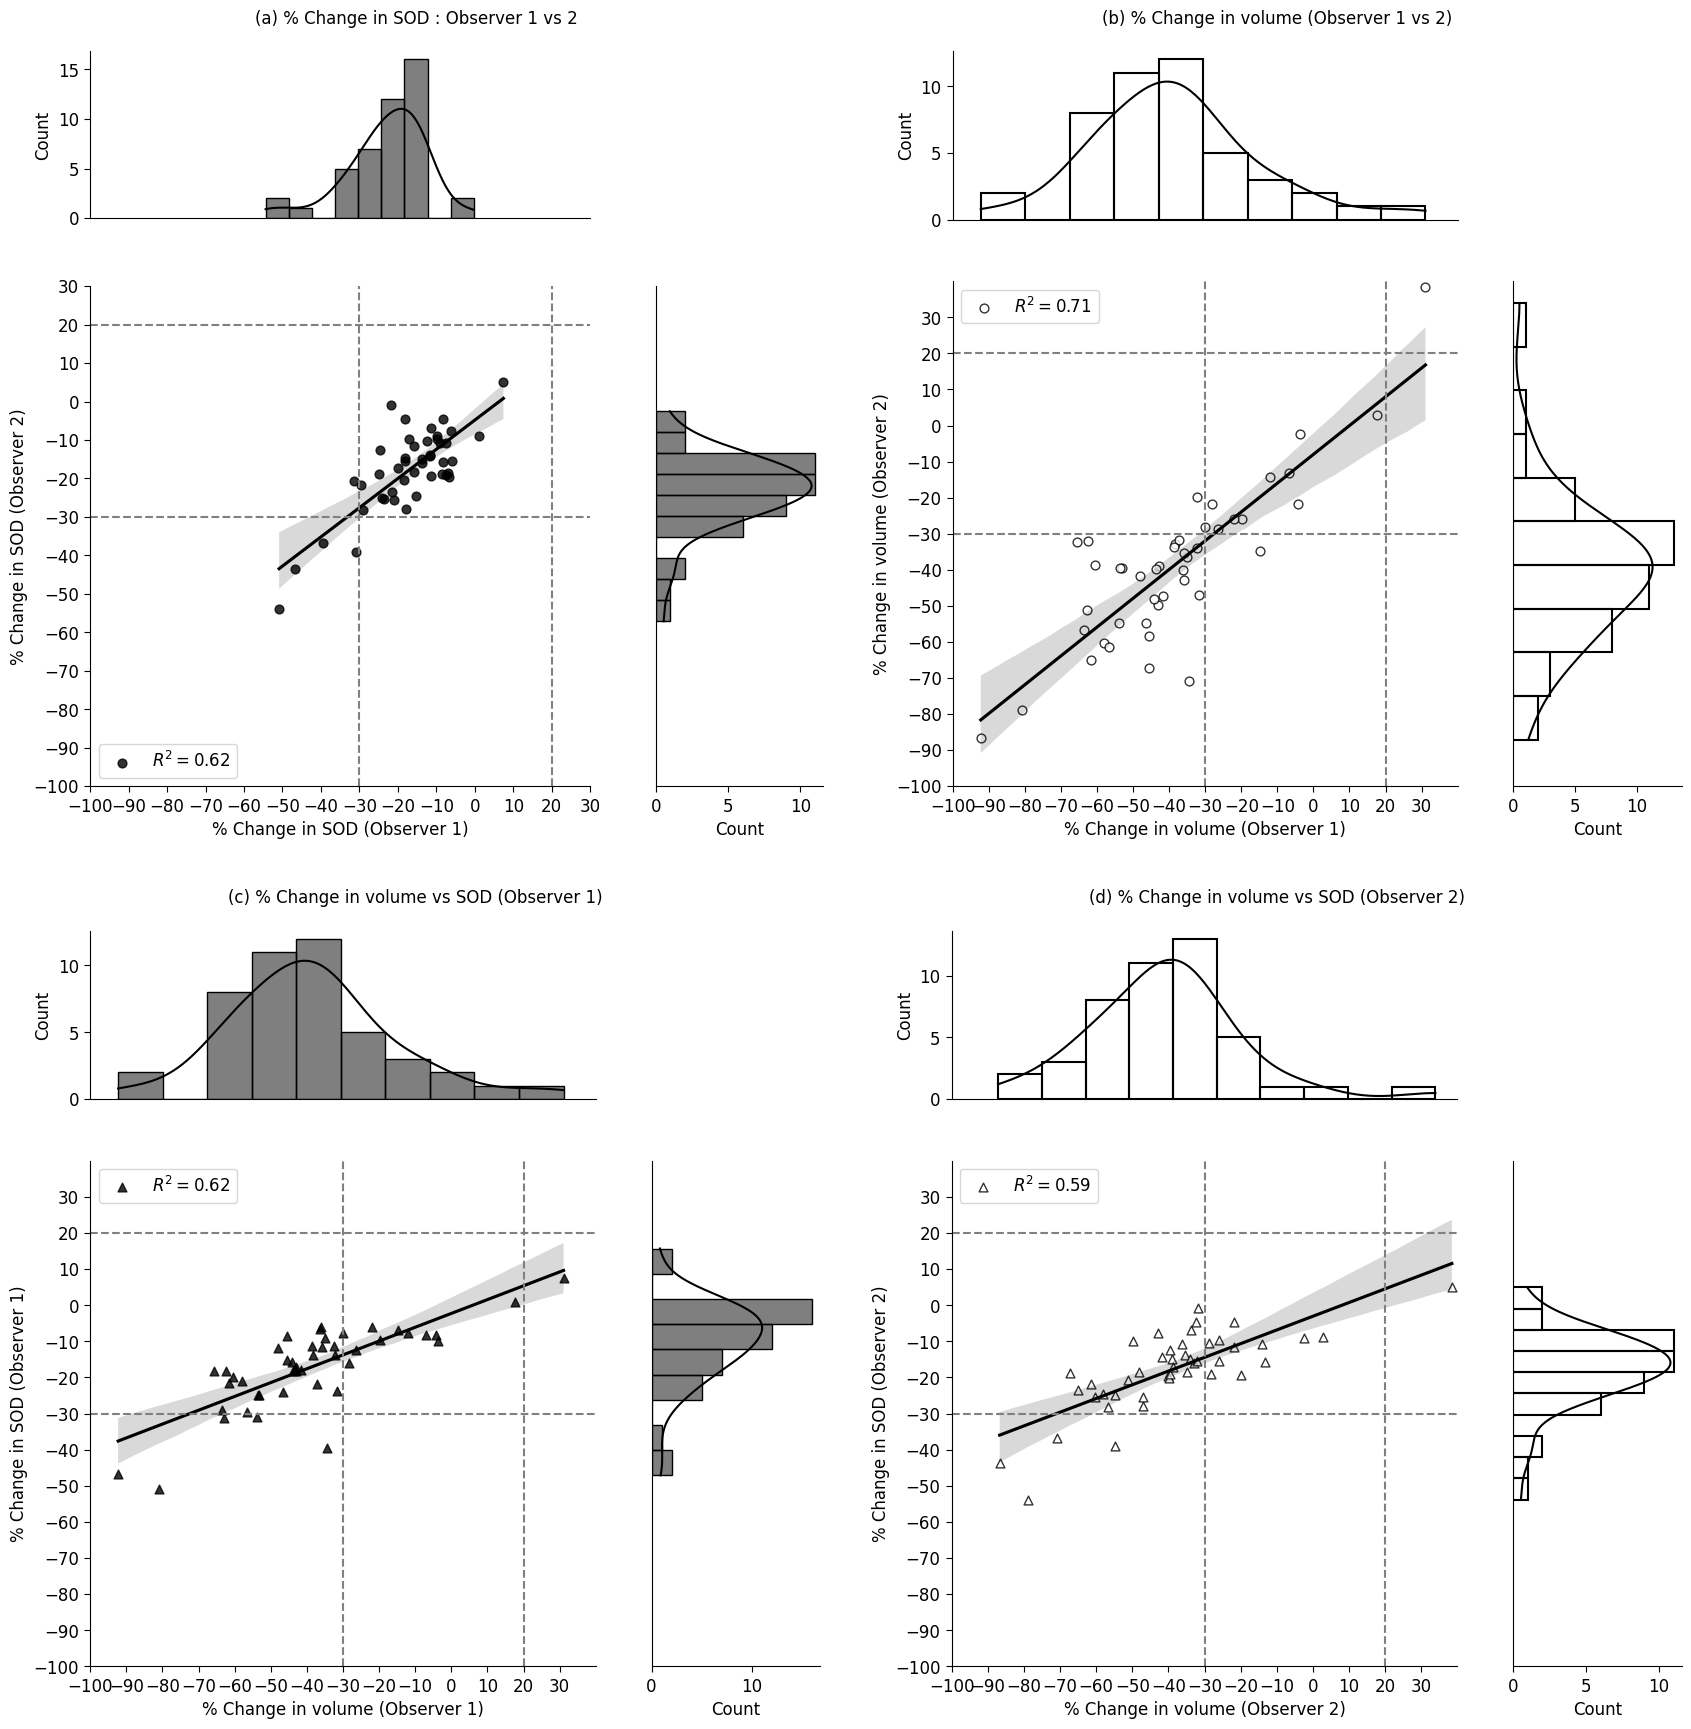

In [25]:
pw.param["margin"] = 0.5
ax192120222423252726283029 = ax192120222423 / ax252726283029
ax192120222423252726283029.savefig()

Save figure 3

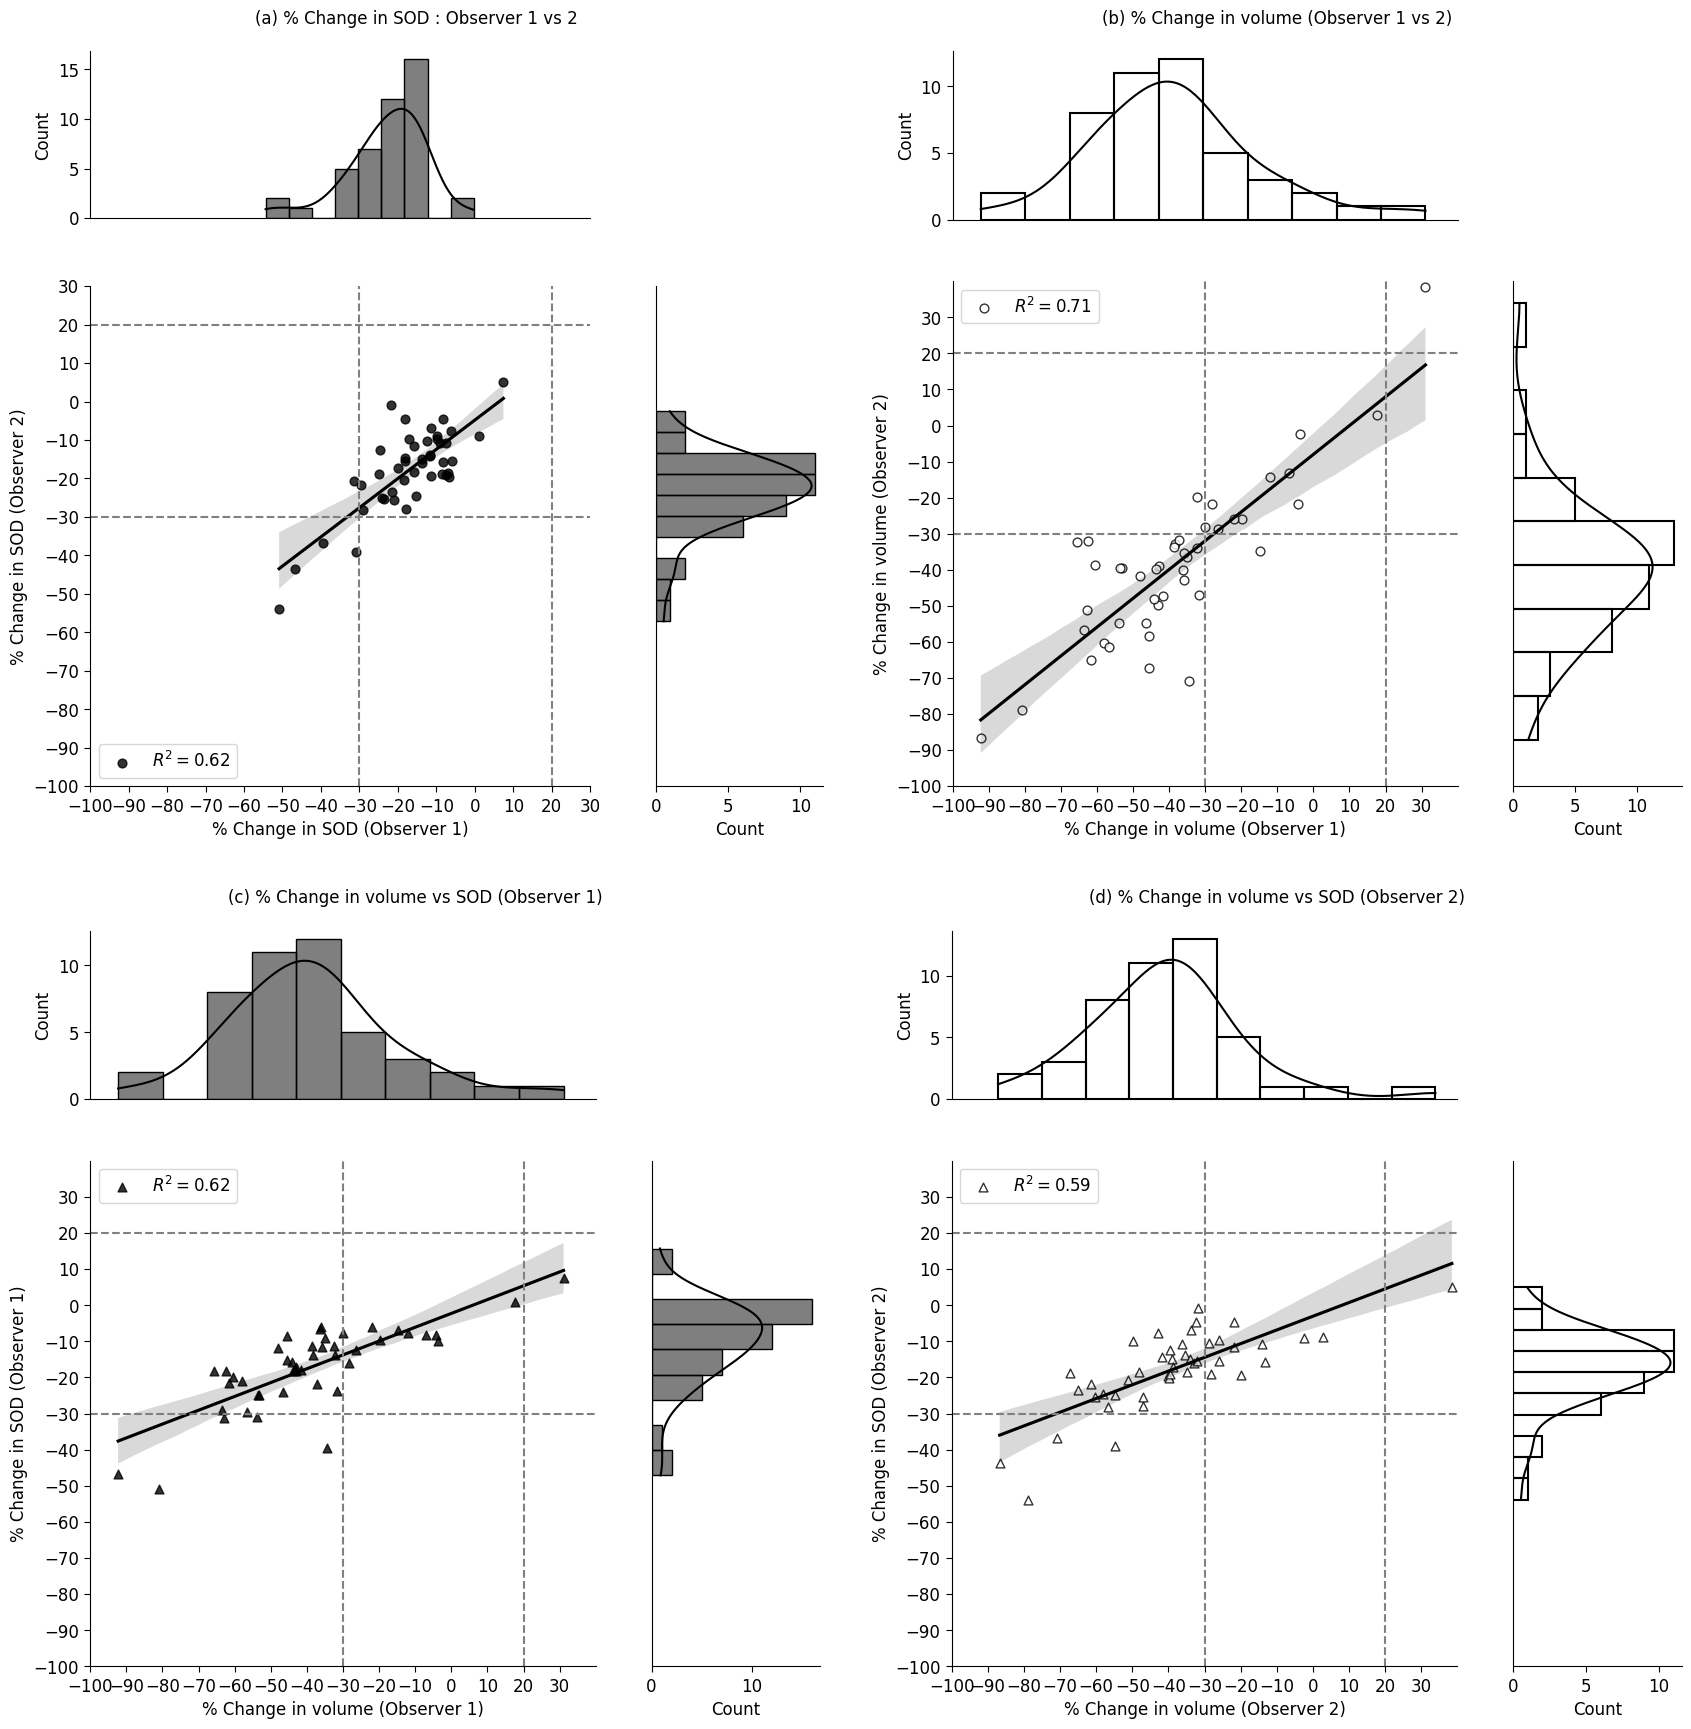

In [26]:
ax192120222423252726283029.savefig("./Figure3.png",dpi=300)
ax192120222423252726283029.savefig("./Figure3.pdf")

### Plot for figure 4

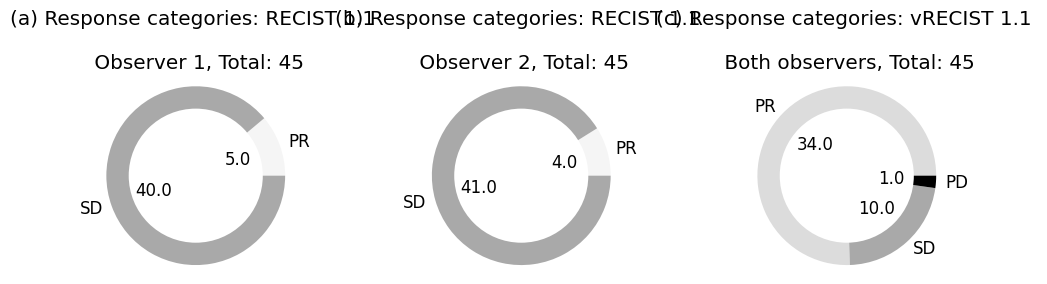

In [28]:
#### Donut plot 1 ##########

fig,axs = plt.subplots(1,3, figsize=(10,3))
plt.subplot(131)
# list of response categories
names = ['PR', 'SD']
# list of their respective numbers
sizes = np.array([5,40])
explode = (0, 0)  # explode a slice if required 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0),0.75,fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(my_circle)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
 
# Give color names
plt.pie(sizes, labels=names, autopct=absolute_value,explode=explode, pctdistance=0.5,
        colors=['whitesmoke', 'darkgray'])
 
p = plt.gcf()
p.gca().add_artist(my_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
axs[0].set_title('(a) Response categories: RECIST 1.1 \n\n Observer 1, Total: 45')



#### Donut plot 2 ##########

plt.subplot(132)
# list of response categories
names = ['PR', 'SD']
 
# list of their respective numbers
sizes = np.array([4,41])
explode = (0, 0)  # explode a slice if required 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0),0.75,fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(my_circle)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
 
# Give color names
plt.pie(sizes, labels=names, autopct=absolute_value,explode=explode, pctdistance=0.5,
        colors=['whitesmoke', 'darkgray']) 
 
p = plt.gcf()
p.gca().add_artist(my_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
axs[1].set_title('(b) Response categories: RECIST 1.1 \n\n Observer 2, Total: 45')


#### Donut plot 3 ##########

plt.subplot(133)
# list of response categories
names = ['PR','SD','PD']
 
# list of their respective numbers
sizes = np.array([34,10,1])
explode = (0,0,0)  # explode a slice if required 
# Create a circle at the center of the plot

my_circle = plt.Circle((0,0),0.75,fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(my_circle)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
 
# Give color names
plt.pie(sizes, labels=names, autopct=absolute_value,explode=explode, pctdistance=0.5,
        colors=['gainsboro','darkgray','black'])
 
p = plt.gcf()
p.gca().add_artist(my_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
axs[2].set_title('(c) Response categories: vRECIST 1.1 \n\n Both observers, Total: 45')

plt.tight_layout()
plt.savefig("./Figure4.png",dpi=300)
plt.savefig("./Figure4.pdf")
# Show the graph
#plt.show()